Nama : Veronika <br>
NIM : 211351147<br>
Kelas : Pagi B

# import Dataset

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"veronika09","key":"f4361acb575c22f77aa0f7fe4f85d7d8"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d ayessa/salary-prediction-classification

  0% 0.00/460k [00:00<?, ?B/s]
100% 460k/460k [00:00<00:00, 112MB/s]


In [4]:
!mkdir salary-prediction-classification
!unzip salary-prediction-classification.zip -d salary-prediction-classification
!ls salary-prediction-classification

Archive:  salary-prediction-classification.zip
  inflating: salary-prediction-classification/salary.csv  
salary.csv


# import library yang digunakan

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

import pickle

# Data Discovery

In [7]:
df = pd.read_csv('/content/salary-prediction-classification/salary.csv')

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df.shape

(32561, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [12]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [13]:
item_count = df.groupby(["sex", "salary"])["salary"].count().reset_index(name="Count")
item_count.head(10)

,sex,salary,Count
0,Female,<=50K,9592
1,Female,>50K,1179
2,Male,<=50K,15128
3,Male,>50K,6662


In [17]:
item_count = df.groupby(["occupation", "sex","salary"])["salary"].count().reset_index(name="Count")
item_count.head(10)

,occupation,sex,salary,Count
0,?,Female,<=50K,789
1,?,Female,>50K,52
2,?,Male,<=50K,863
3,?,Male,>50K,139
4,Adm-clerical,Female,<=50K,2325
5,Adm-clerical,Female,>50K,212
6,Adm-clerical,Male,<=50K,938
7,Adm-clerical,Male,>50K,295
8,Armed-Forces,Male,<=50K,8
9,Armed-Forces,Male,>50K,1


# EDA (minimal 5)

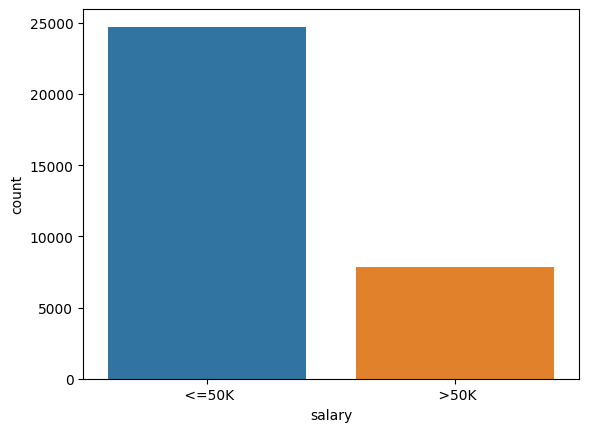

In [15]:
sns.countplot(x=df['salary'], data=df)
plt.show()

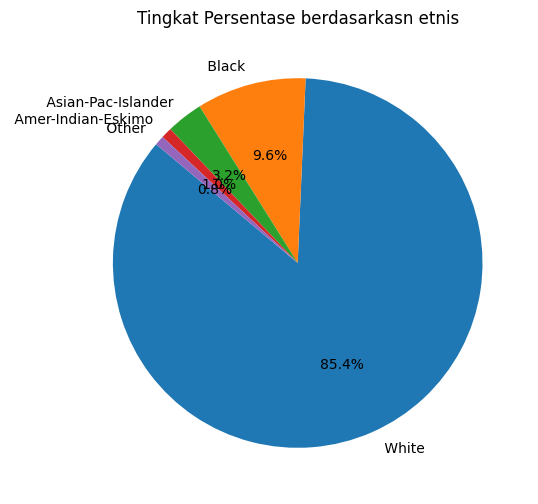

In [23]:
plt.figure(figsize=(6, 6))
plt.title('Tingkat Persentase berdasarkasn etnis')

count_pekerjaan = df['race'].value_counts()

plt.pie(count_pekerjaan, labels=count_pekerjaan.index, autopct='%1.1f%%', startangle=140)

plt.show()

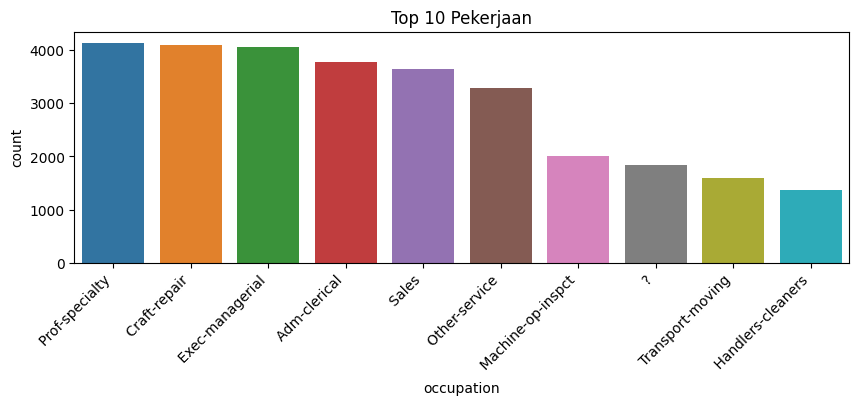

In [21]:
# Menghitung jumlah kabupaten per provinsi
count_jenis_pekerjaan = df['occupation'].value_counts()

# Mengambil top 10 provinsi
top_10_pekerjaan = count_jenis_pekerjaan.head(10)

# Membuat plot menggunakan seaborn dengan rotasi label 45 derajat
plt.figure(figsize=(10, 3))
plot = sns.countplot(x='occupation', data=df, order=top_10_pekerjaan.index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right')  # Menambahkan rotasi 45 derajat
plt.title('Top 10 Pekerjaan')
plt.show()

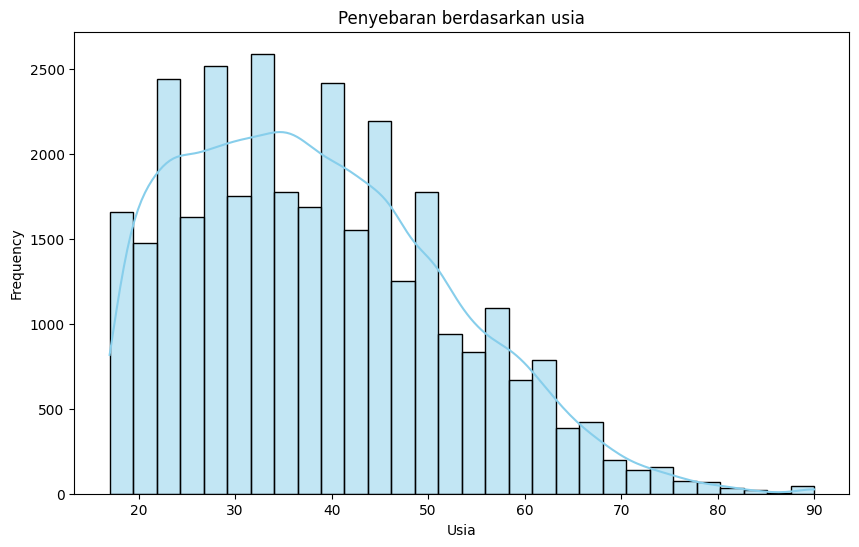

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Penyebaran berdasarkan usia')
plt.xlabel('Usia')
plt.ylabel('Frequency')
plt.show()

plt.show()

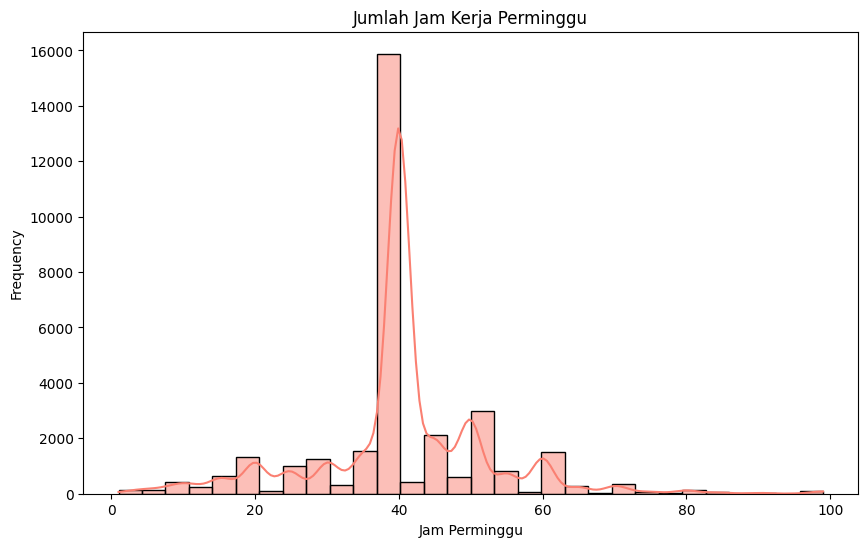

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['hours-per-week'], bins=30, kde=True, color='salmon')
plt.title('Jumlah Jam Kerja Perminggu')
plt.xlabel('Jam Perminggu')
plt.ylabel('Frequency')
plt.show()

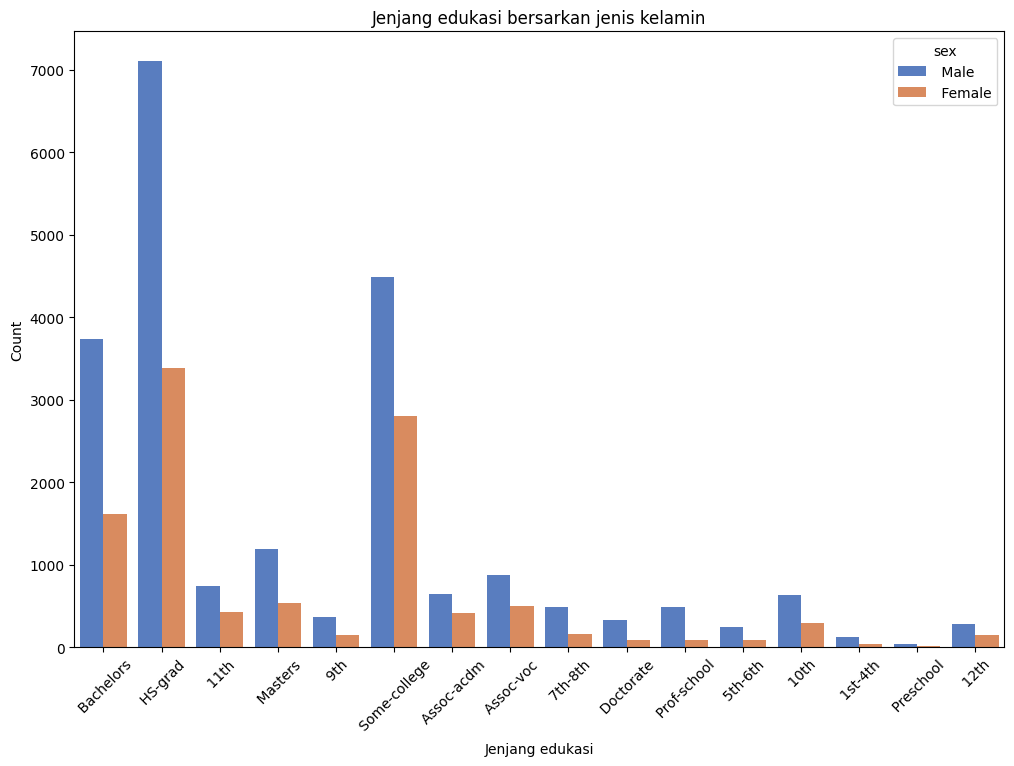

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(x='education', data=df, hue='sex', palette='muted')
plt.title('Jenjang edukasi bersarkan jenis kelamin')
plt.xlabel('Jenjang edukasi')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Preprocessing

In [32]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [33]:
def segment_country(country):
    if country in [' United-States', ' Canada', ' England', ' Germany', ' France', ' Italy', ' Holand-Netherlands', ' Ireland', ' Scotland', ' Portugal', ' Greece']:
        return 'Western'
    elif country in [' India', ' Japan', ' China', ' Hong', ' Taiwan', ' Philippines', ' Vietnam', ' Thailand', ' Laos']:
        return 'Asian'
    elif country in [' Mexico', ' Cuba', ' Jamaica', ' Puerto-Rico', ' Honduras', ' El-Salvador', ' Guatemala', ' Dominican-Republic', ' Nicaragua', ' Peru', ' Columbia']:
        return 'Latin American'
    else:
        return 'Other'

df['region'] = df['native-country'].apply(segment_country)

In [34]:
print("Unique Regions:")
print(df['region'].unique())

['Western' 'Latin American' 'Asian' 'Other']


In [35]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary,region
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,Western
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Western
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Western
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Western
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Latin American
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Western
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,Latin American
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,Western
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,Western
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,Western


In [36]:
df.drop(columns = 'native-country', inplace=True)

In [37]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary,region
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K,Western
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K,Western
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K,Western
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K,Western
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K,Latin American


In [38]:
label_encoder = LabelEncoder()

object_columns = df.select_dtypes(include=['object']).columns

for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  salary          32561 non-null  int64
 14  region          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


# modeling

In [39]:
x = df.drop(['salary'],axis=1)
y = df['salary']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [41]:
dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Tingkat Akurasi data training = {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Tingkat akurasi data testing = {dtc_acc} \n")

Tingkat Akurasi data training = 0.8444190944190945
Tingkat akurasi data testing = 0.8442010441191524 



In [42]:
confusion_mat = confusion_matrix(y_test, y_pred)

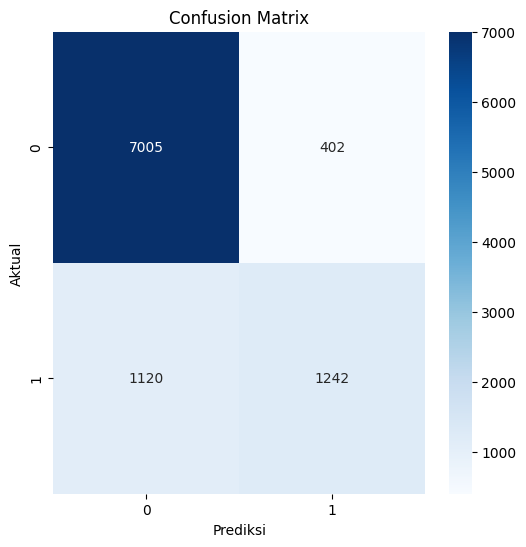

In [43]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [44]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary,region
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,0,3
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,0,3
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,0,3
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,0,3
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,0,1
5,37,4,284582,12,14,2,4,5,4,0,0,0,40,0,3
6,49,4,160187,6,5,3,8,1,2,0,0,0,16,0,1
7,52,6,209642,11,9,2,4,0,4,1,0,0,45,1,3
8,31,4,45781,12,14,4,10,1,4,0,14084,0,50,1,3
9,42,4,159449,9,13,2,4,0,4,1,5178,0,40,1,3


In [45]:
input_data = (39,7,77516,9,13,4,1,1,4,1,2174,0,40,3)

input_data_as_numpy_array = np.array(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0):
  print('Gaji Kurang dari sama dengan 50k')
else:
  print('Gaji diatas 50k')

[0]
Gaji Kurang dari sama dengan 50k


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Visualisasi hasil algoritma

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 9 (	) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


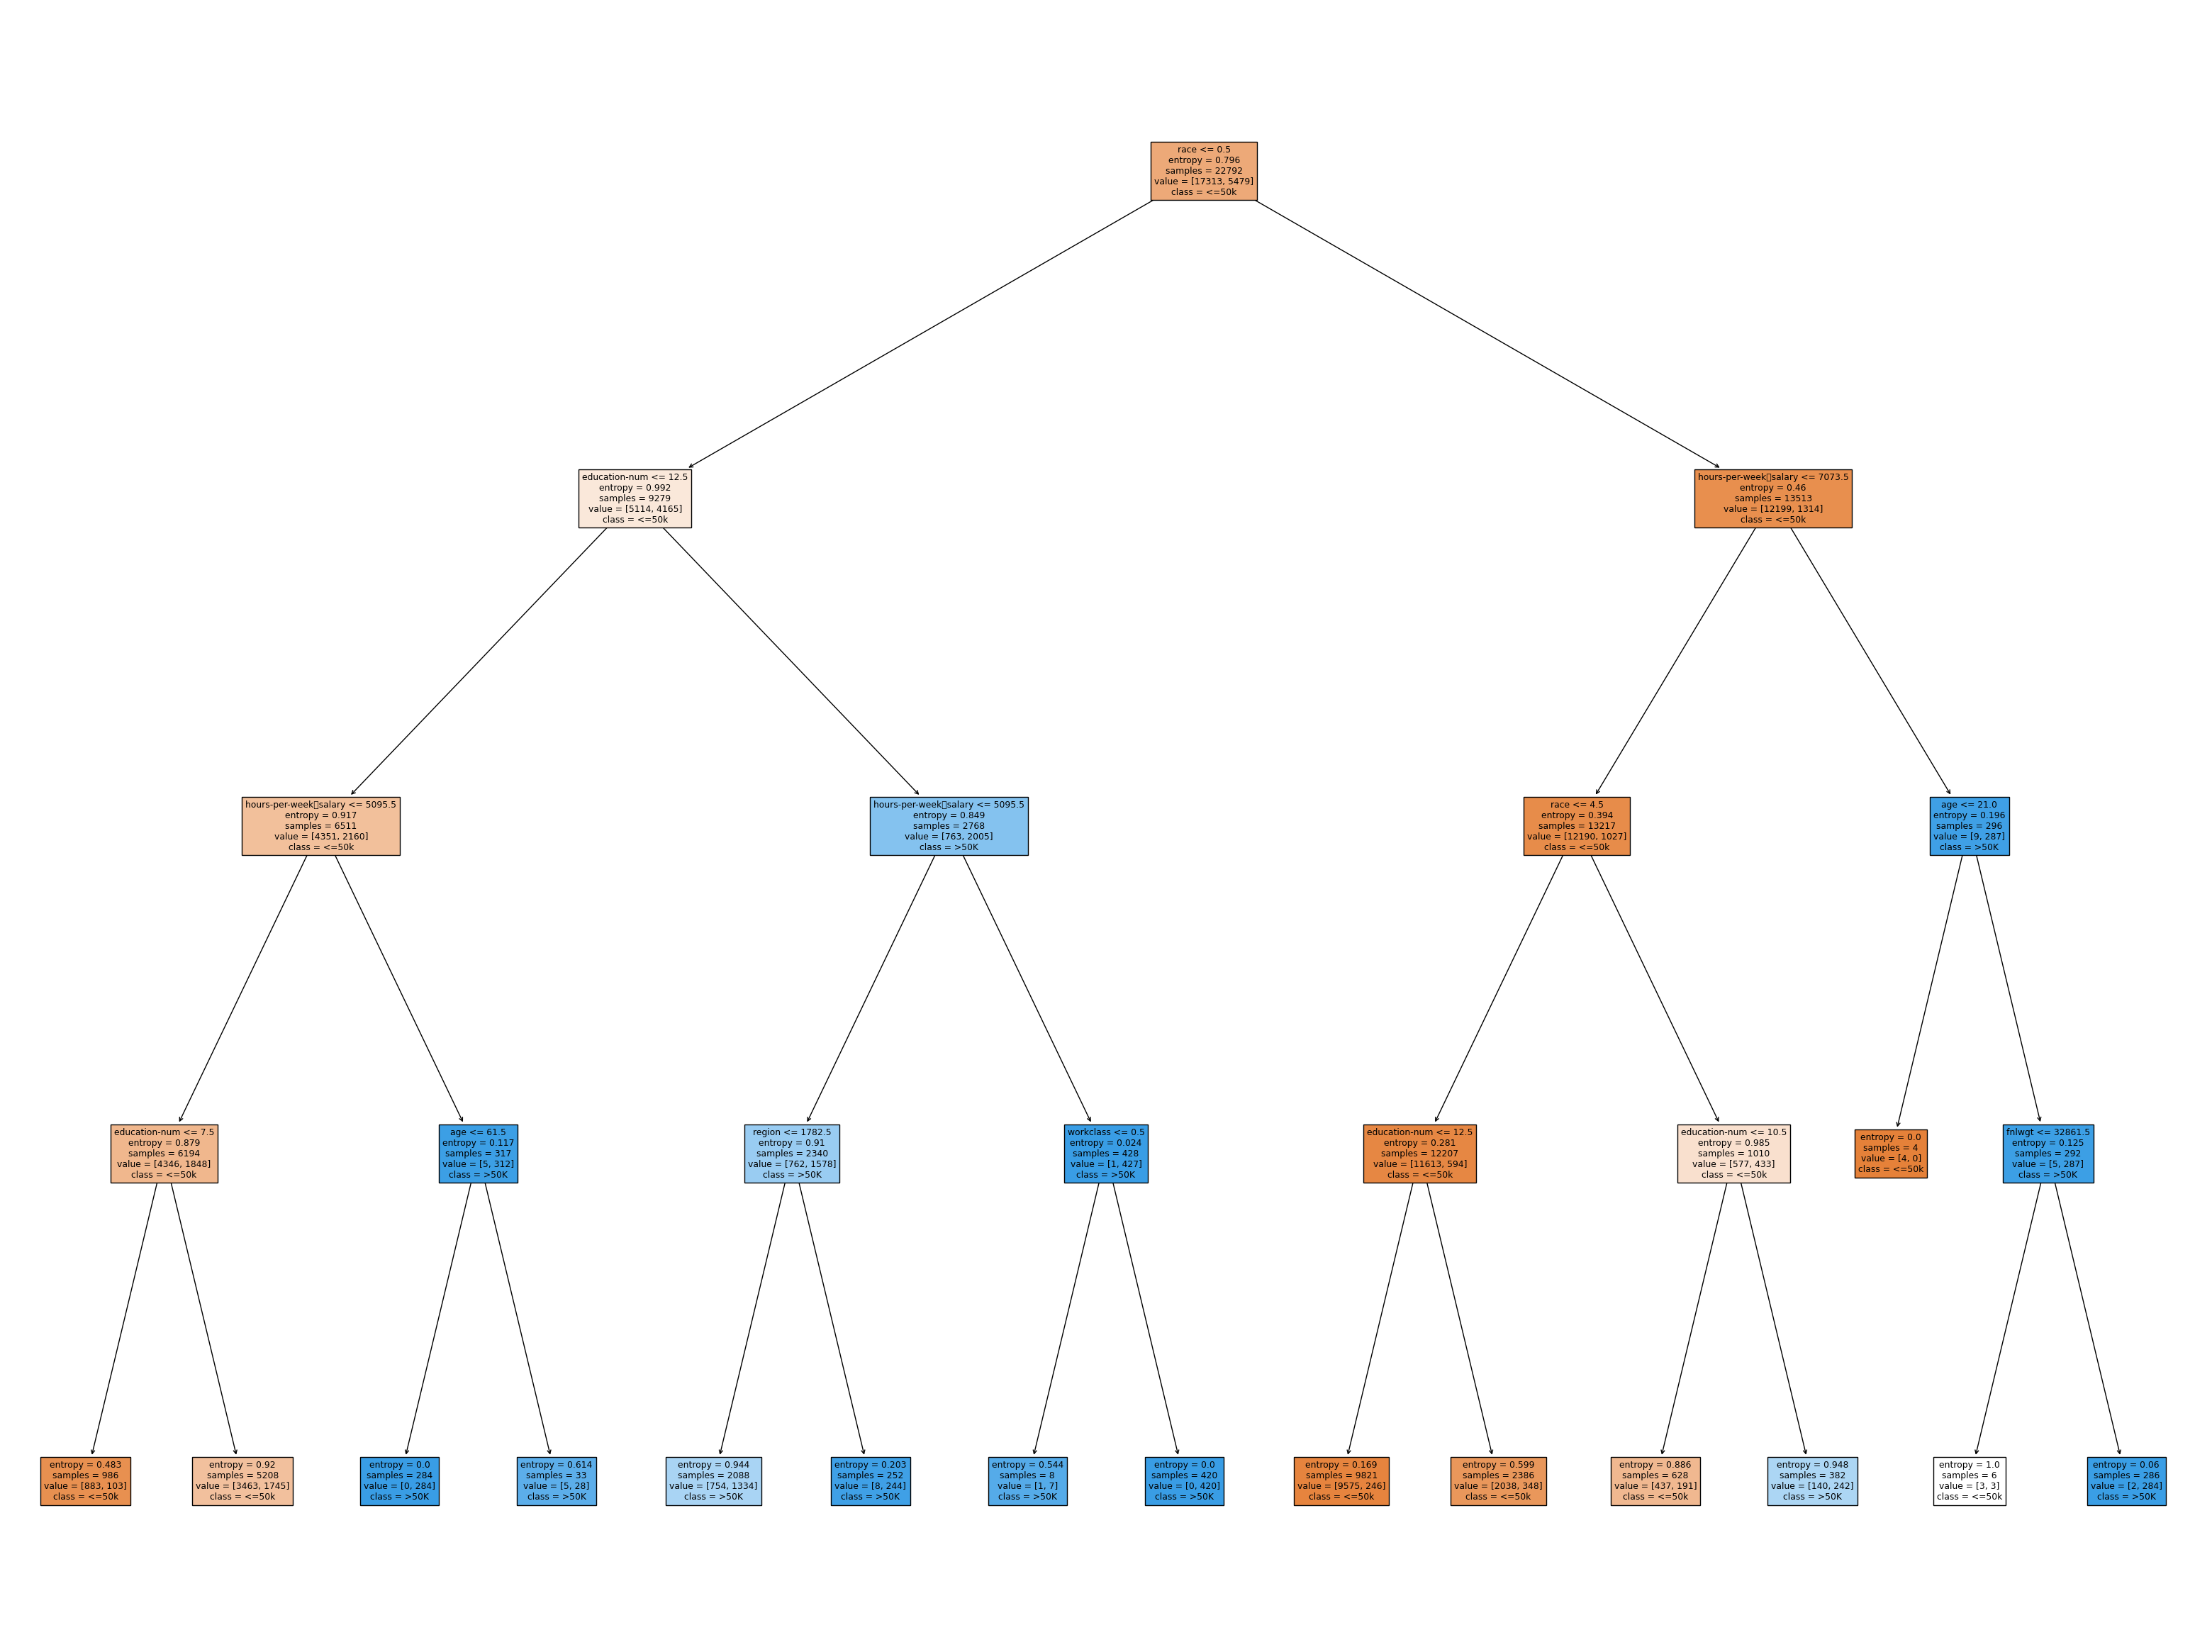

In [46]:
plt.figure(figsize=(40,30))
tree.plot_tree(
    model,
    feature_names=['age','workclass',	'fnlwgt',	'education',	'education-num',	'marital-status	occupation',	'relationship',	'race',	'sex',	'capital-gain	capital-loss',	'hours-per-week	salary','region'],
    class_names = ['<=50k','>50K'],
    filled = True
)
plt.show()

# save model (pickle)

In [47]:
filename = 'salary_class.sav'
pickle.dump(model, open(filename,'wb'))